# Task 1.1 - Data Understanding `povertyByState.csv`

In [12]:
# This will take a while
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import plotly.offline as py


# Set a seed for reproducibility
np.random.seed(42)

# Import the dataset
# Poverty by state and year
df_poverty = pd.read_csv('../ds/raw/povertyByStateYear.csv')



In [13]:
print("--"*50)
df_poverty.info()

----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884 entries, 0 to 883
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   state              884 non-null    object 
 1   year               884 non-null    int64  
 2   povertyPercentage  832 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 20.8+ KB


In [14]:
## First look at poverty dataset
print(df_poverty.head())

# Information about columns, data types, and presence of null values
print(df_poverty.info())

# Counting unique values for each column
print("##########################################")
print("Counts unique values for each column")
print(df_poverty.nunique())

print("##########################################")
print("List of all the values for the feature 'state'")

# Problem: there are 52 states
unique_state_values = df_poverty['state'].unique()
print(unique_state_values)
print("##########################################")

# See the case where state = 'United States'
# Select rows where 'state' is 'United States'
print("Values for US")
df_united_states = df_poverty[df_poverty['state'] == 'United States']
print(df_united_states)

## Since I can't derive anything from it -> remove rows with United States for the State feature
df_poverty_filtered = df_poverty[df_poverty['state'] != 'United States']
print("##########################################")
print("Reprinting unique values for each column")
print(df_poverty_filtered.nunique())


           state  year  povertyPercentage
0  United States  2020               11.5
1        Alabama  2020               14.8
2         Alaska  2020               11.5
3        Arizona  2020               12.1
4       Arkansas  2020               15.8
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884 entries, 0 to 883
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   state              884 non-null    object 
 1   year               884 non-null    int64  
 2   povertyPercentage  832 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 20.8+ KB
None
##########################################
Counts unique values for each column
state                 52
year                  17
povertyPercentage    146
dtype: int64
##########################################
List of all the values for the feature 'state'
['United States' 'Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California'
 'Colora

Data types for this dataset are correct: object for the state is ok, int for the year column and foat for povertyPercebtae by definition.
The initial datatset contains 52 states: for **District of Columbia** we decide to include it for the analysis but the value 'United states' can't be reshaped in a more fine grained value, so is dropped. 

In [15]:
max_value_year = df_poverty_filtered['year'].max()
min_value_year = df_poverty_filtered['year'].min()
print(f"The range of the year for this dataset is {min_value_year};{max_value_year}")

max_value_perc = df_poverty_filtered['povertyPercentage'].max()
min_value_perc = df_poverty_filtered['povertyPercentage'].min()
print(f"The range of the povertyPercentage for this dataset is {min_value_perc};{max_value_perc}")

The range of the year for this dataset is 2004;2020
The range of the povertyPercentage for this dataset is 5.4;21.8


Now let's see some info regarding missing values

In [16]:
# Counting missing data for each column
print("Missing values for each column:")
print(df_poverty_filtered.isnull().sum())

## Displaying missing data
column_missing_values = 'povertyPercentage'

# Select rows with missing data in the specific column
df_poverty_missing_povertyPercentage = df_poverty_filtered[df_poverty_filtered[column_missing_values].isnull()]

# Print the selected rows
print(df_poverty_missing_povertyPercentage)

#### To manage the null data for 2012
df_filt_pure = df_poverty_filtered
df_filt_pureB = df_poverty_filtered


Missing values for each column:
state                 0
year                  0
povertyPercentage    51
dtype: int64
                    state  year  povertyPercentage
417               Alabama  2012                NaN
418                Alaska  2012                NaN
419               Arizona  2012                NaN
420              Arkansas  2012                NaN
421            California  2012                NaN
422              Colorado  2012                NaN
423           Connecticut  2012                NaN
424              Delaware  2012                NaN
425  District of Columbia  2012                NaN
426               Florida  2012                NaN
427               Georgia  2012                NaN
428                Hawaii  2012                NaN
429                 Idaho  2012                NaN
430              Illinois  2012                NaN
431               Indiana  2012                NaN
432                  Iowa  2012                NaN
433             

In [17]:
# Calculate alternative poverty percentage based on filtered data and grouping by year
alternative_poverty_percentage = df_poverty_filtered.groupby('year')['povertyPercentage'].mean()
print("alternative poverty percentage", alternative_poverty_percentage)

# Calculate median poverty percentage excluding the year 2012
median_poverty_percentage = df_poverty_filtered[df_poverty_filtered['year'] != 2012]['povertyPercentage'].median()

# Weighted average using Gaussian distribution with weights favoring nearby years
# Weights are assigned to years from 2004 to 2020, with a Gaussian distribution centered at 2012 but excluding 2012
years_list = df_poverty_filtered['year'].unique()
years_list = np.sort(years_list)

sigma = 4
# Compute Gaussian weights for each year based on their distance from 2012
gaussian_weighting = np.exp(-np.square(years_list - 2012)/(2*sigma**2))

# Remove the 12th value (2012) from the Gaussian weighting
gaussian_weighting = np.delete(gaussian_weighting, 8)
print("gaussian weighting")
print(gaussian_weighting)

# Remove 2012 from alternative poverty percentage
alternative_poverty_percentage = alternative_poverty_percentage.drop(2012)

# Apply Gaussian weighting to the poverty percentage by multiplying each year's value with the corresponding weight,
# then dividing by the sum of the weights
expected_poverty_percentage = np.sum(alternative_poverty_percentage * gaussian_weighting) / np.sum(gaussian_weighting)
print("expected poverty percentage \n", expected_poverty_percentage)

# Replace missing values for the year 2012 with the calculated expected poverty percentage
df_poverty_filtered.loc[df_poverty_filtered['year'] == 2012, 'povertyPercentage'] = expected_poverty_percentage
print("Missing values for each column")
print(df_poverty_filtered.isnull().sum())

# Filter the DataFrame for the year 2012
df_pov2012 = df_poverty_filtered[df_poverty_filtered['year'] == 2012]
print(df_pov2012.head()[['state', 'povertyPercentage']])

# Assign the filtered DataFrame to a new variable for testing purposes
df_prova = df_poverty_filtered


alternative poverty percentage year
2004    12.074510
2005    11.970588
2006    12.058824
2007    12.635294
2008    13.447059
2009    13.973077
2010    14.376000
2011    14.209804
2012          NaN
2013    13.715686
2014    13.135294
2015    12.498039
2016    12.033333
2017    11.270588
2018    10.972549
2019    10.884314
2020    11.170588
Name: povertyPercentage, dtype: float64
gaussian weighting
[0.13533528 0.21626517 0.32465247 0.45783336 0.60653066 0.7548396
 0.8824969  0.96923323 0.96923323 0.8824969  0.7548396  0.60653066
 0.45783336 0.32465247 0.21626517 0.13533528]
expected poverty percentage 
 13.03046576793185
Missing values for each column
state                0
year                 0
povertyPercentage    0
dtype: int64
          state  povertyPercentage
417     Alabama          13.030466
418      Alaska          13.030466
419     Arizona          13.030466
420    Arkansas          13.030466
421  California          13.030466


Spiegazione gaussian weighted method #todo
In alterantiva, mostriamo il metodo semplice di sostituzione del valore con la mediana:

In [18]:

#################################### Calcola la mediana della poverty percentage escludendo il 2012
poverty_fil_perc = df_filt_pure
median_poverty_percentage = poverty_fil_perc[poverty_fil_perc['year'] != 2012]['povertyPercentage'].median()

# Imputa i dati mancanti nel 2012 con la mediana calcolata
poverty_fil_perc.loc[poverty_fil_perc['year'] == 2012, 'povertyPercentage'] = median_poverty_percentage

# controllo se andato a buon fine:
print("Missing values for each column")
print(poverty_fil_perc.isnull().sum())
variabile_d_appoggio = poverty_fil_perc[df_poverty_filtered['year'] == 2012]

# Stampa le percentuali di povertà per tutti gli stati nel 2012
print(variabile_d_appoggio.head()[['state', 'povertyPercentage']])




Missing values for each column
state                0
year                 0
povertyPercentage    0
dtype: int64
          state  povertyPercentage
417     Alabama               12.0
418      Alaska               12.0
419     Arizona               12.0
420    Arkansas               12.0
421  California               12.0


## Considerations about povery percentage
Given the nature of poverty percentage data type, can use the boxplot just to see if there are any outliers.
To know the distribution we plot it using an histogram. 

As later shown, there are no outliers and respectively emerge that:
- *State with highest peverty percentage*: New Mexico, 2013: 21.8
- *State with lowest peverty percentage*: New Hampshire, 2018: 5.4

It's important to highlight the distribution of mean (*poverty percentage*) for all the states with respect to the years we can do some considerations:
    - Mean of poverty percentage increases starting from 2007/2008 until 2010
    - The historical condition corresponds to a the real estate/finance bailout, leading to  an increse of unemployment so the mean increases
    - from now on decreases until 2008 (exept for 2011->2012-2013) this is given by the fact that in thoose years USA's economy booted up
    - The increase in 2011, the ***decrease*** in 2012 and the increase 2013 can be explained by the fact that we replaced 2012 NaN values, but we'll not make effort in reconstructing it because as our year range of interests start from $2013$, so we decided to drop the data prior to it.

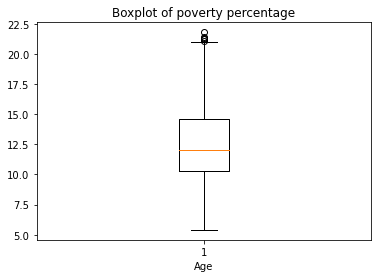

State with the highest poverty percentage:
state                New Mexico
year                       2013
povertyPercentage          21.8
Name: 396, dtype: object
Value: 21.8%
State with the lowest poverty percentage:
state                New Hampshire
year                          2018
povertyPercentage              5.4
Name: 134, dtype: object
Value: 5.4%


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

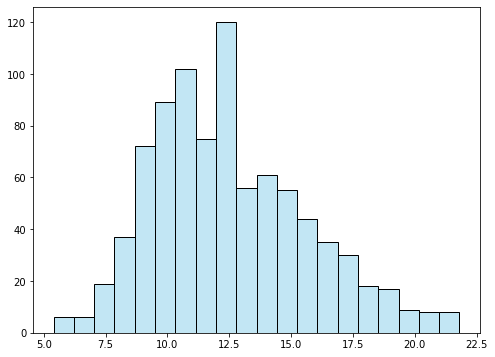

In [19]:
# Create a boxplot to visualize the distribution
filtered_data = df_poverty_filtered['povertyPercentage']
plt.boxplot(filtered_data, vert=True)  # vert=False makes it horizontal
plt.xlabel('Age')
plt.title('Boxplot of poverty percentage')
plt.show()

# State with the highest poverty percentage
state_highest_poverty = df_poverty.loc[df_poverty['povertyPercentage'].idxmax()]
print("State with the highest poverty percentage:")
print(state_highest_poverty)
highest_poverty_percentage = state_highest_poverty['povertyPercentage']
print(f"Value: {highest_poverty_percentage}%")

# State with the lowest poverty percentage
state_low_poverty = df_poverty.loc[df_poverty['povertyPercentage'].idxmin()]
print("State with the lowest poverty percentage:")
print(state_low_poverty)
low_poverty_percentage = state_low_poverty['povertyPercentage']
print(f"Value: {low_poverty_percentage}%")

# Histogram
plt.figure(figsize=(8, 6))
sns.histplot(df_poverty_filtered['povertyPercentage'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Poverty Percentage')
plt.xlabel('Poverty Percentage')
plt.ylabel('Frequency')
plt.show()

# Percentiles (Q1, Median, Q3)
percentiles = np.percentile(df_poverty_filtered['povertyPercentage'], [25, 50, 75])
print("Percentiles (Q1, Median, Q3):", percentiles)

# Now with the DataFrame of 2012 percPov reconstructed via median: poverty_fil_perc
# Calculate the median of povertyPercentage for each year
mean_pov = poverty_fil_perc.groupby('year')['povertyPercentage'].mean().reset_index()

# Plot the line graph showing the mean of povertyPercentage for all states
plt.figure(figsize=(12, 6))
sns.lineplot(data=mean_pov, x='year', y='povertyPercentage', marker='o', color='skyblue')
plt.title('Mean of Poverty Percentage per Year (All States)(with median)')
plt.xlabel('Year')
plt.ylabel('Mean Poverty Percentage')
plt.show()


REMOVING THE NaNs for the years 2012 the shape of the distribution(mean(povertyPercentage)) give us a coherent distribution

In [ ]:
# Remove rows where the year is 2012
df_poverty_noNan = df_poverty_filtered[df_poverty_filtered['year'] != 2012]

# Filter the DataFrame for the year 2012 only
year_2012 = df_prova[df_prova['year'] == 2012]
print(year_2012.head()[['state', 'povertyPercentage']])

# Calculate the median of 'povertyPercentage' for each year
mean_pov = df_poverty_noNan.groupby('year')['povertyPercentage'].mean().reset_index()

# Line plot of the average 'povertyPercentage' for all states over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=mean_pov, x='year', y='povertyPercentage', marker='o', color='skyblue')
plt.title('Average Poverty Percentage per Year (All States)')
plt.xlabel('Year')
plt.ylabel('Average Poverty Percentage')
plt.show()


In [ ]:
# Sort the DataFrame by 'povertyPercentage' in descending order
df_poverty_sorted = df_poverty_noNan.sort_values(by='povertyPercentage', ascending=False)
print(df_poverty_sorted)

# Create a bar chart showing the poverty percentage for each state
plt.figure(figsize=(12, 8))
plt.bar(df_poverty_sorted['state'], df_poverty_sorted['povertyPercentage'], color='skyblue')
plt.title('Poverty Percentage per State (Sorted)')
plt.xlabel('State')
plt.ylabel('Poverty Percentage')
plt.xticks(rotation=90, ha='right')  # Rotate state labels for better readability
plt.tight_layout()

# Display the chart
plt.show()

# Set display options to show all rows and columns for better visibility
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(df_poverty_sorted)

# Reset back to default options after printing
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')


# Visualize `povertyByStateYear` dataset



In [ ]:
import plotly.express as px
import pandas as pd
import numpy as np


# dataset poverty
df_poverty = pd.read_csv('../ds/raw/povertyByStateYear.csv')

df_poverty.head()

# Create dictionary state (two letter)
dict_state = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
} 

print("number of states", len(df_poverty[df_poverty.state!='United States'].state.unique()))

poverties = df_poverty[df_poverty.state!='United States'].groupby('state').povertyPercentage.mean()
states = df_poverty[df_poverty.state!='United States'].state.unique()
states_abb = [dict_state[st] for st in df_poverty[df_poverty.state != 'United States'].state.unique()]
fig= px.choropleth(locations=states_abb, locationmode='USA-states', color=poverties, scope='usa', color_continuous_scale='Reds', range_color=(np.min(poverties), np.max(poverties)), title='Mean poverty percentage per state in USA')
fig.show()

# Final cleaning on poverty dataset

Given that the incidents dataset starts from 2013, we'll remove rows from the current poverty dataframe where the year value is less than 2012 (*as 2012 data has already been removed*).

In [ ]:
# Final cleaning on poverty dataset
df_poverty_before_merge = df_poverty_noNan[df_poverty_noNan['year'] > 2013]
# check the range of the years
anno_minimo = df_poverty_before_merge['year'].min()
anno_massimo = df_poverty_before_merge['year'].max()
print(f"The range of years is {anno_minimo};{anno_massimo}")


In [ ]:
df_poverty_before_merge.groupby('year').count()

In [ ]:
file_path = "../ds/cleaned/poverty_cleaned.csv"
df_poverty_before_merge.to_csv(file_path, index=False)

# # Task 1.1 - Data Understanding `year_state_district_house.csv`

In [ ]:

# Year-state-district-house
df_ys = pd.read_csv('../ds/raw/year_state_district_house.csv')

print(df_ys.head())
print(df_ys.info())

# Party


Convert the column `party` in categorical since it is object:

In [ ]:
df_ys['party'] = df_ys['party'].astype('category')
print(df_ys.info())

In [ ]:
# Count unique values for each column
print("##########################################")
print("Counts unique values for each column")
print(df_ys.nunique())
print("##########################################")

# List all the unique values for the 'party' feature
print("List of all the values for the feature 'party'")
unique_party_values = df_ys['party'].unique()
print(unique_party_values)


#### Considerations about `party` values
The value `FOGLIETTA (DEMOCRAT)` is a democrat candidate but wrongly inserted as a party so it's replaced `DEMOCRAT`.

Also `DEMOCRATIC-FARMER-LABOR` need to be replaced because is just local affiliate of the natioal party, so it's replaced by `DEMOCRAT`.
The value `INDEPENDENT-REPUBLICAN` is a better specification on **INDEPENDET** will keep just `INDEPENDENT`.

In [ ]:
df_ys.replace({'FOGLIETTA (DEMOCRAT)': 'DEMOCRAT'}, inplace=True)
df_ys.replace({'DEMOCRATIC-FARMER-LABOR': 'DEMOCRAT'}, inplace=True)
df_ys.replace({'INDEPENDENT-REPUBLICAN': 'INDEPENDENT'}, inplace=True)

print("##########################################")
print("Counts unique values for each column")
print(df_ys.nunique())
print("##########################################")
print("List of alle the values for the feature 'party'")
unique_state_values = df_ys['party'].unique()
print(unique_state_values)


### `state` attribute

Check if the `state` are the totality of the states in USA and format the state names in a correct format:

In [ ]:
print("##########################################")
unique_state_values = df_ys['state'].unique()
print(unique_state_values)

#Change the format of `state` to be able to merge with the other two dataset later, in Data Preparation
def capitalize_first_letter(word):
        # Split the string into words
    words = word.split()
    
    # Capitalize the first letter of each word and lowercase the rest
    capitalized_words = [w.capitalize() for w in words]
    
    # Join the words back together
    return ' '.join(capitalized_words)

df_ys['state'] = df_ys['state'].apply(capitalize_first_letter)
print(df_ys['state'].nunique())

#Recompute to we mantain all the states
unique_state_values = df_ys['state'].unique()
print(unique_state_values)

for state in dict_state:
    if state not in unique_state_values:
        print("Missing state:" + state)
#print(unique_state_values)

### `year` attribute

In [ ]:
max_value_year = df_ys['year'].max()
min_value_year = df_ys['year'].min()
print(f"The range of the year for this dataset is {min_value_year};{max_value_year}")
#range of poverty ds is year 2004-2020

# Print max and min year values
print("Min year:", min_value_year)
print("Max year:", max_value_year)

It's important to highlight that the `date` in `incidents` dataset ranges from 2013 to 2020, the same for  `povertyByState` cleaned ranges from 2013 to 2020; differently, for `state house` the year range is from 1976 to 2020.
We decided to remove the record that refer the years from 76-2013 as are not useful for our purposes. 

In [ ]:
df_ys_date = df_ys[df_ys['year'] > 2013]
max_value_year = df_ys_date['year'].max()
min_value_year = df_ys_date['year'].min()
print(f"The range of the year for this dataset is {min_value_year};{max_value_year}")

We also noticed that there is no data related to party wins in 2013 because there were no elections/polls. 

Check on null values  and duplicates for the dataset:

In [ ]:
# Stampa il numero di valori nulli per ciascuna colonna
print(df_ys_date.isnull().sum())

# Controlla i valori duplicati in tutto il DataFrame
duplicati = df_ys_date.duplicated()

# Stampa le righe duplicate
print("Righe duplicate:")
print(df_ys_date[duplicati])

### `congressional_district` attribute

In [ ]:
zero_values = df_ys_date[df_ys_date['congressional_district'] == 0]

# Stampa le righe risultanti
print("Righe con 'congressional_district' uguale a zero:")
print(zero_values)



Drop zero values from congressional district

In [ ]:
zero_val = df_ys_date[df_ys_date['congressional_district'] == 0]
# Stampa le righe risultanti
print("Righe con 'congressional_district' uguale a zero:")
print(len(zero_val))


In [ ]:
# DO NOT remove column distrectional_district
# Pefrom check on congressional_district value per year per state to be able to derive insights when merging with incidents respect to
# most violent district, which is the political preference of the most violent district, etc.
#df_ys_date_no_congress = df_ys_date.drop(columns=['congressional_district'])


df_ys_date_no_congress =  df_ys_date

#### Considerations about `totalvotes`, `candidatevotes`
We may try to extract some insights like if in a given state a party have more votes but at the same time the opposition party gained the State Federal Goverment seat as they won the majority of the district.
At the end, we can drop the two column and aggregate,for each year and each state, the winner party, renaming the column in `winner_party`.

In [ ]:
### Check if the two columns have zero values
print(np.count_nonzero(df_ys_date['totalvotes']==0))
print(np.count_nonzero(df_ys_date['candidatevotes']==0))


# totalvotes and candidatevotes
independently from the presence of missing values, dulìplicated, out of range values, ... -> we drop the theese two columns since are not useful for our task: considerations can be done within the dataset (like electors have partecipated to the polls) but not useful for the global considerations driven by the merge of the whole 3 datasets

In [ ]:
#df_ys_date_no_candidate = df_ys_date_no_congress.drop(columns=['candidatevotes'])
#df_ys_date_no_total_votes = df_ys_date_no_candidate.drop(columns=['totalvotes'])
#print(df_ys_date_no_total_votes.head())
#df_ys_cleaned=df_ys_date_no_total_votes


DS is cleaned: use df_ys_cleaned

### Frequency of party winning in each states

Vedere quante volte c'è un singolo partito ha vinto negli anni per ogni stato

So at this point we have the party winners in each state for each year

In [ ]:
# dato che alla fine non abbiamo tolto totalvotes and candidate votes ricopio il dataset altrimenti si rompe
df_ys_cleaned = df_ys_date
# Raggruppa per 'state', 'party' e conta le occorrenze
conteggio_vittorie = df_ys_cleaned.groupby(['state', 'party', 'year']).size().reset_index(name='conteggio')
print(conteggio_vittorie)

import matplotlib.pyplot as plt

"""
#GRAFICO a torta per vedere la per ogni stato la percentuale di vittorie che ha raggiunto ogni ogni partito
for stato in df_ys_cleaned['state'].unique():
    # Filtra il DataFrame per uno stato specifico
    df_stato = conteggio_vittorie[conteggio_vittorie['state'] == stato]

    # Crea un diagramma a torta per lo stato corrente
    plt.figure(figsize=(2, 2))
    plt.pie(df_stato['conteggio'], labels=df_stato['party'], autopct='%1.1f%%', startangle=90)
    plt.title(f'Party Wins in {stato}')
    plt.show()
"""

In [ ]:
# lo dropperei, quando lo fatto sembrava sembrava avesse ma ora sembra non abbia senso
"""
# Raggruppa i dati per 'state' e 'party' e conta il numero di occorrenze
grouped_data = df_ys_date.groupby(['state', 'party']).size().unstack()

# Visualizza un grafico a barre
grouped_data.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.xlabel('State')
plt.ylabel('Number of Occurrences')
plt.title('Party Wins by State')
plt.legend(title='Party', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

conteggio_party_per_stato = df_ys_date .groupby(['state', 'party']).size().reset_index(name='conteggio')
# Visualizza il conteggio
print(conteggio_party_per_stato)
"""

In [ ]:
#todo: fare considerazioni sui numeri e su informazioni aggiuntive 
#occ per la combinazione di year e party
wins_per_year = df_ys_date.groupby(['year', 'party']).size().reset_index(name='cont')
# Pivot: 'party' come colonne
pivot_df = wins_per_year.pivot(index='year', columns='party', values='cont').fillna(0)
pivot_df.plot(kind='line', figsize=(15, 8))
plt.xlabel('Year')
plt.ylabel('Number of Wins per district')
plt.title('Party Wins Over the Years')
plt.legend(title='Party', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


mean_wins_party = wins_per_year.groupby('party')['cont'].mean().reset_index()
dev_st_wins_party = wins_per_year.groupby('party')['cont'].std().reset_index()

print("Mean wins per party:")
print(mean_wins_party)

print("\nstnd deviation wins per party:")
print(dev_st_wins_party)

SO WE KEEP JUST BEFORE THE MERGING THE COLUMNS FOR TOTAL VOTES AND CANDIDATE VOTES BUT WE ARE NOT ABLE TO MAKE CHECKS ON THE RANGE AND EFFECTIVE VALUES FOR THOOSE DATA

EXPORT the dataset: df_ys_date

In [ ]:
print(df_ys_date['state'].nunique())

In [ ]:

file_path = "../ds/cleaned/year_state_votes_cleaned.csv"
df_ys_date.to_csv(file_path, index=False)